# Bayesian Data Analysis in Python

## Chapter 4

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc3 as pm
import seaborn as sns
from matplotlib import pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. 

In [2]:
bikes = pd.read_csv("bikes_test.csv")
bikes

,work_day,temp,humidity,wind_speed,num_bikes
0,0,0.265833,0.687917,0.175996,2.947
1,1,0.282609,0.622174,0.153800,3.784
2,1,0.354167,0.496250,0.147379,4.375
3,1,0.256667,0.722917,0.133721,2.802
4,1,0.265000,0.562083,0.194037,3.830
5,1,0.280833,0.540000,0.116929,3.831
6,0,0.224167,0.731250,0.289796,2.169
7,0,0.127500,0.464583,0.409212,1.529
8,1,0.222500,0.411250,0.167283,3.422
9,1,0.319167,0.508750,0.141179,3.922


In [5]:
formula = "num_bikes ~ temp + work_day"

with pm.Model() as model_1:
    
    pm.GLM.from_formula(formula, data=bikes)

    trace_1 = pm.sample(draws=1000, tune=500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\rpitc\AppData\Local\Temp\ipykernel_26960\2026274764.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_1 = pm.sample(draws=1000, tune=500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, work_day, temp, Inter

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 26 seconds.
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
There were 88 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6729188693900671, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 68 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6827555967359236, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


C:\Users\rpitc\AppData\Local\Temp\ipykernel_26960\972626169.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_1)
C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


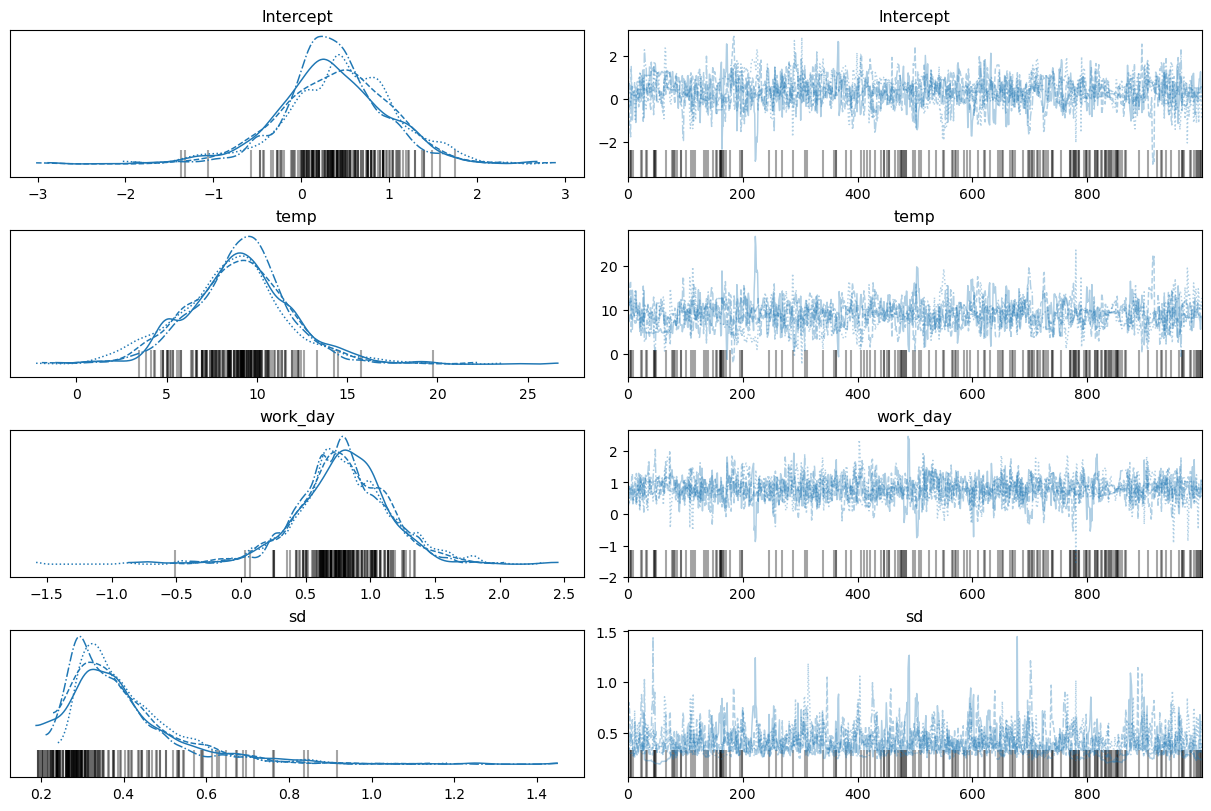

C:\Users\rpitc\AppData\Local\Temp\ipykernel_26960\972626169.py:6: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_1)
C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


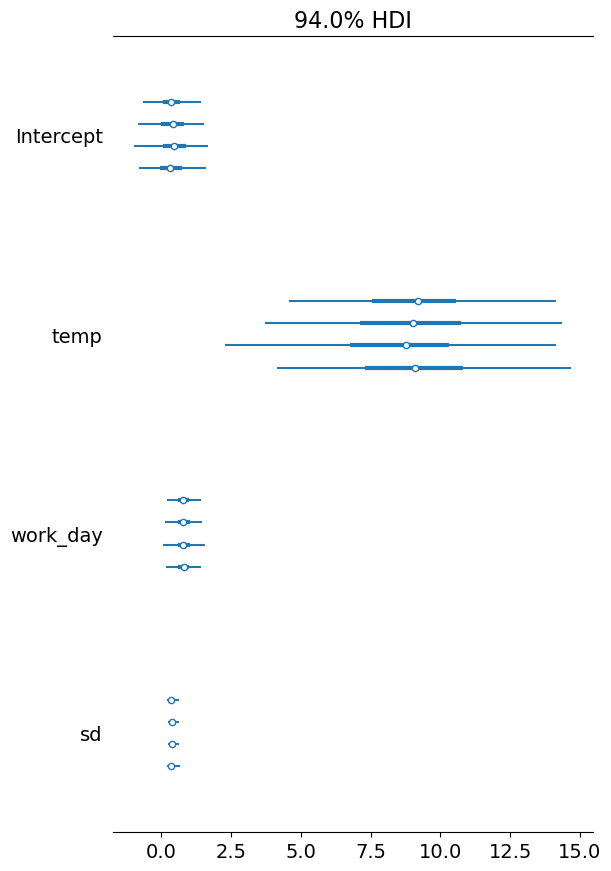

In [6]:
# Draw a trace plot of trace_1
pm.traceplot(trace_1)
plt.show()

# Draw a forest plot of trace_1
pm.forestplot(trace_1)
plt.show()

In [7]:
pm.summary(trace_1)

C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.383,0.636,-0.722,1.669,0.027,0.019,525.0,919.0,1.01
temp,8.943,2.895,3.642,14.505,0.130,0.092,481.0,606.0,1.01
work_day,0.791,0.361,0.070,1.426,0.012,0.009,778.0,1198.0,1.00
sd,0.398,0.135,0.210,0.649,0.006,0.004,288.0,157.0,1.02


In [8]:
formula = "num_bikes ~ temp + work_day + wind_speed"

with pm.Model() as model_2:
    
    pm.GLM.from_formula(formula, data=bikes)

    trace_2 = pm.sample(draws=1000, tune=500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\rpitc\AppData\Local\Temp\ipykernel_26960\408235013.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_2 = pm.sample(draws=1000, tune=500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, wind_speed, work_day, 

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 49 seconds.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
There were 239 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5308442370484182, but should be close to 0.8. Try to increase the number of tuning steps.
There were 268 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5020716104845163, but should be close to 0.8. Try to increase the number of tuning steps.
There were 90 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\Users\rpitc\AppData\Local\Temp\ipykernel_26960\1484090537.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_2)
C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


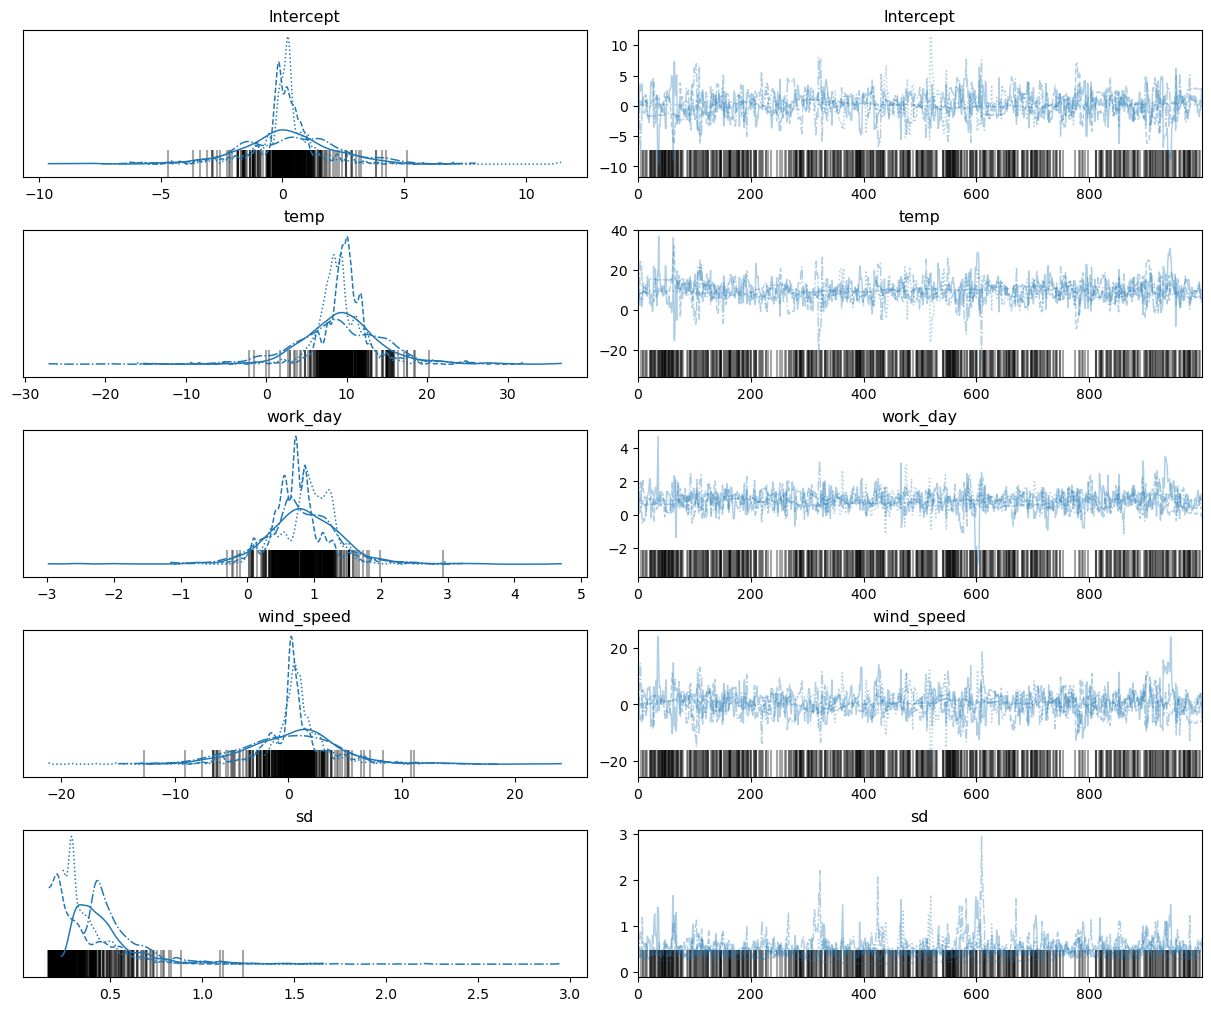

C:\Users\rpitc\AppData\Local\Temp\ipykernel_26960\1484090537.py:6: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_2)
C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


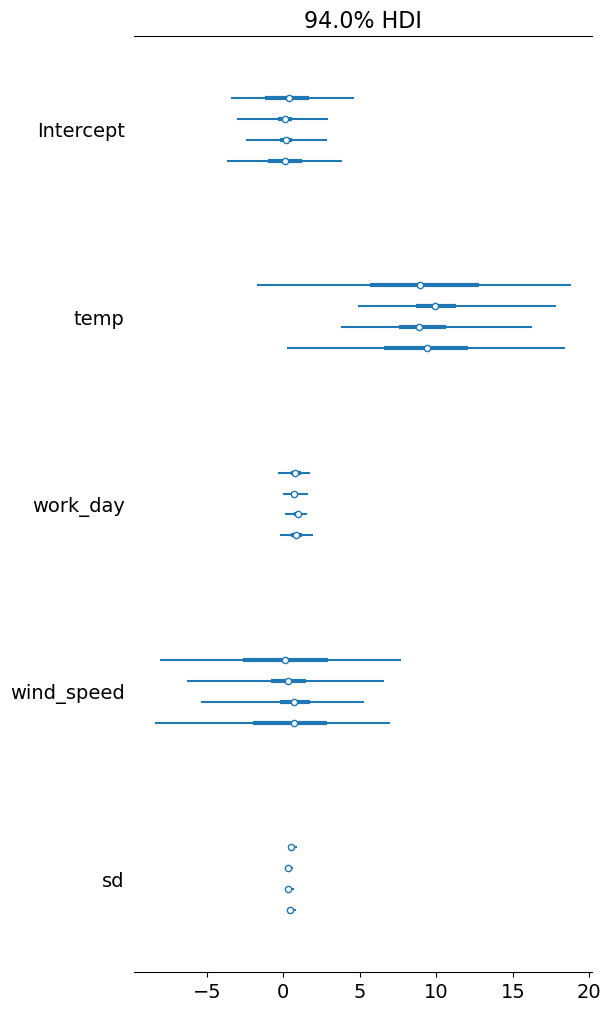

In [9]:
# Draw a trace plot of trace_1
pm.traceplot(trace_2)
plt.show()

# Draw a forest plot of trace_1
pm.forestplot(trace_2)
plt.show()

In [10]:
pm.summary(trace_2)

C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.150,1.833,-3.442,3.835,0.071,0.075,521.0,824.0,1.08
temp,9.403,4.593,0.904,18.409,0.187,0.136,443.0,589.0,1.08
work_day,0.829,0.518,-0.093,1.753,0.022,0.016,424.0,1151.0,1.02
wind_speed,0.438,3.682,-6.962,7.205,0.140,0.146,632.0,783.0,1.07
sd,0.442,0.208,0.167,0.763,0.042,0.030,15.0,21.0,1.20


In [13]:
# Gather trace_1 and trace_2 into a dictionary
traces_dict = {"trace_1": trace_1, "trace_2": trace_2}

# Create a comparison table based on WAIC
comparison = pm.compare(traces_dict, ic="waic")

# Draw a comparison plot
pm.compareplot(comparison, textsize=20)
plt.show()

C:\Programs\anaconda3\envs\datacamp-pymc3\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Print bikes_test head
print(bikes_test.head())

# Define the formula
formula = "num_bikes ~ temp + work_day + wind_speed"

# Generate predictive draws
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=bikes_test)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_2)

In [ ]:
# Initialize errors
errors = []

# Iterate over rows of bikes_test to compute error per row
for index, test_example in bikes_test.iterrows():
    error = posterior_predictive["y"][:, index] - test_example["num_bikes"]
    errors.append(error)

# Reshape errors
error_distribution = np.array(errors).reshape(-1)

# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

In [ ]:
# Draw a trace plot of trace
pm.traceplot(trace)
plt.show()

# Print a summary of trace
summary = pm.summary(trace)
print(summary)

# Get each parameter's posterior mean
intercept_mean = np.mean(trace.get_values("Intercept")) 
organic_mean = np.mean(trace.get_values("type_organic")) 
price_mean = np.mean(trace.get_values("price")) 
sd_mean = np.mean(trace.get_values("sd")) 

In [3]:
# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
for price in [0.5, 0.75, 1, 1.25]:
    pred_mean = (intercept_mean + price_mean * price + organic_mean)
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    profit_pred = price * volume_pred
    predicted_profit_per_price.update({price: profit_pred})
    
# Draw a forest plot of predicted profit for all prices
pm.forestplot(predicted_profit_per_price)
plt.show()

NameError: name 'intercept_mean' is not defined

In [ ]:
# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
for price in [0.5, 0.75, 1, 1.25]:
    pred_mean = (intercept_mean + price_mean * price + organic_mean)
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    profit_pred = price * volume_pred
    predicted_profit_per_price.update({price: profit_pred})
    
# Draw a forest plot of predicted profit for all prices
pm.forestplot(predicted_profit_per_price)
plt.show()

# Calculate and print HPD of predicted profit for the optimal price
opt_hpd = az.hdi(predicted_profit_per_price[0.75], credible_interval=.99)
print(opt_hpd)